# Penn State STAT501 - Applied Regression Models

![](https://www.engr.psu.edu/ae/thesis/portfolios/2014/gvl5037/penn%20state%20logo.png)

source: [Penn State Statistics 501](https://newonlinecourses.science.psu.edu/stat501/node/251/)

In [1]:
import pandas as pd
import numpy as np

# import plotting libraries

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

# Statistical Packages
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

---
# Lesson 1: Simple Linear Regression



## Example 1: Teen Birth Rate and Poverty Level 

source: [1.10 Further Example PSU STAT501](https://newonlinecourses.science.psu.edu/stat501/node/288/)

![](https://psmag.com/.image/c_limit%2Ccs_srgb%2Cq_auto:good%2Cw_600/MTI3NTgxOTc4Mjk0ODA4NTQ2/sad-piggy-bank.webp)

_(PHOTO: DOODER/[SHUTTERSTOCK](http://www.shutterstock.com/))_


The variables are y = year 2002 birth rate per 1000 females 15 to 17 years old and x = poverty rate, which is the percent of the stateâ€™s population living in households with incomes below the federally defined poverty level. _(Data source: Mind On Statistics, 3rd edition, Utts and Heckard)._

In [2]:
poverty = pd.read_table("https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/examples/poverty/index.txt")
poverty.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


The plot of the data below (birth rate on the vertical) shows a generally linear relationship, on average, with a positive slope. As the poverty level increases, the birth rate for 15 to 17 year old females tends to increase as well.

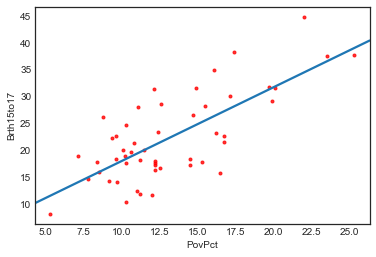

In [3]:
# Scatter plot least swares regression line added
sns.regplot(poverty.PovPct, poverty.Brth15to17, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

In [4]:
#create fitted model
lm = smf.ols(formula='Brth15to17 ~ PovPct', data = poverty).fit()

print(lm.params,'\n')

Intercept    4.267293
PovPct       1.373345
dtype: float64 



#### Interpretation of the coefficients
With the _fitted line_ for regression superimposed on the data, the above output is the intercept and slope. 
- __Slope__ = 1.373 which means that 15 to 17 year old birth rate increate 1.973 units, on average, for each one unit (one percent) increate in the poverty rate


- __Intercept__ = 4.267 means that if there were states with pvoerty rate = 0, the predicted average for the 15 to 17 year old birth rate would be 4.267 for those states. _since there are no states with poverty rate = 0 this incerpretation of the incercept is not practiceally meaningul for this example. 



In [5]:
# r-squared
print("r-squared = ", lm.rsquared)

r-squared =  0.5333279627871969


#### Interpretation of the R-Squared
The value of r2 can be interpreted to mean that poverty rates "explain" 53.3% of the observed variation in the 15 to 17 year old average birth rates of the states.

__The next plot graphs our trend line (green), the observations (dots), and our confidence interval (red).__

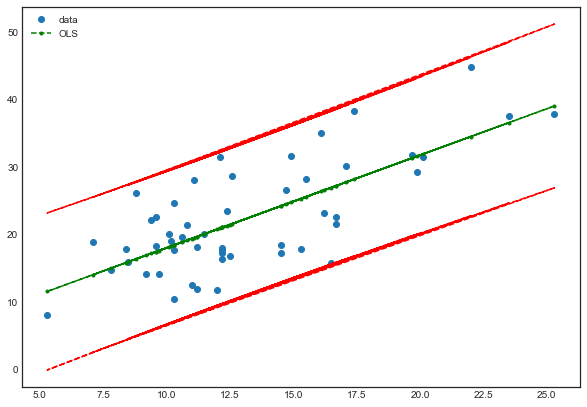

In [6]:
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predictor variable (x) and dependent variable (y)
x = poverty[['PovPct']]
y = poverty[['Brth15to17']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(lm)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, lm.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

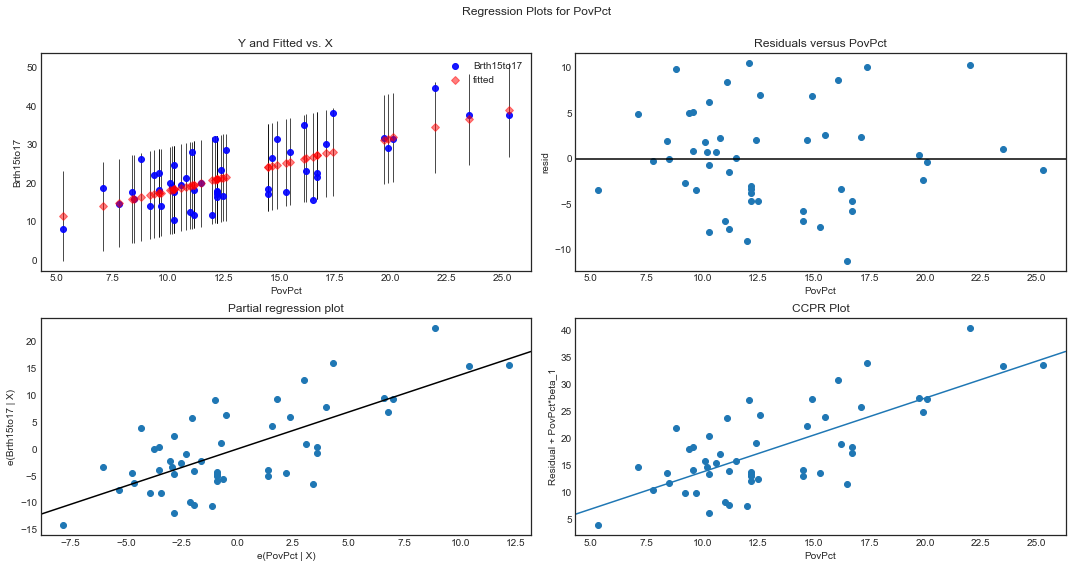

In [7]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(lm, "PovPct", fig=fig)

--- 
# Skin Cancer

![](https://static1.squarespace.com/static/592d7e08414fb5ddd3b0eef8/t/5b07026b6d2a73b58ecbc21c/1527186056008/Skin-Cancer-Prevention.jpg)

__Objective:__ this example is concerning the relationship between __skin cancer__ `mortaility` and `state latitude`. The __(y) response__ is the `mortality rate` _(number of deaths per 10 million people)_ or white males due to malignant skin melanoma from 1950-1959. The __(x) predictor__ is the `latitude` at the center of each of the 49 states in the United States.  

data source: https://newonlinecourses.science.psu.edu/stat501/sites/onlinecourses.science.psu.edu.stat501/files/data/skincancer/index.txt

A subset of the data looks as such:

In [8]:
cancer = pd.read_csv("./data/skincancer.csv")
cancer.head()

,State,Lat,Mort,Ocean,Long
0,Alabama,33.0,219,1,87.0
1,Arizona,34.5,160,0,112.0
2,Arkansas,35.0,170,0,92.5
3,California,37.5,182,1,119.5
4,Colorado,39.0,149,0,105.5


## Is there a relationship between state latitude and skin cancer mortality?

Below is a scatterplot of the statistical relationship of the response variable y is the mortality due to skin cancer (number of deaths per 10 million people) and the predictor variable x is the latitude (degrees North) at the center of each of 49 states in the U.S.

beta = [ 389.189 , -5.978 ]
R=-0.825, 
p_value=0.000, 
stderr=0.598


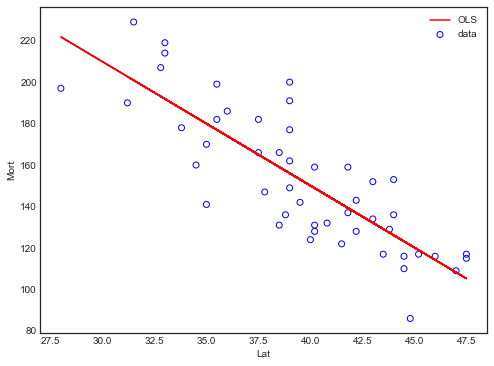

In [9]:
# https://nbviewer.jupyter.org/github/mscaudill/IntroStatLearn/blob/master/notebooks/Ch3_Linear_Regression/Lab_Linear_Regression.ipynb
# create a figure to plot our data and OLS estimate
fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(cancer.Lat.values, cancer.Mort.values, facecolors='none',
          edgecolors='b', label='data')
ax.set_xlabel('Lat')
ax.set_ylabel('Mort')

# call scipy linregress returning fit coefficients and simple statistics
beta1, beta0, r_value, p_value, stderr = stats.linregress(cancer.Lat.values,
                                                         cancer.Mort.values)

# add the estimation to the data plot
ax.plot(cancer.Lat.values, beta0 + beta1 * cancer.Lat.values,
       color = 'r', label = 'OLS')
ax.legend(loc='best')

# print the regression estimates and returned from scipy
print('beta = [', round(beta0,3), ',', round(beta1,3),']')
print('R={0:.3f}, \np_value={1:.3f}, \nstderr={2:.3f}'.format(r_value, p_value, stderr))

There appears to be a negative linear relationship between latitude and mortality due to skin cancer, but the relationship is not perfect.

To answer the question _Is there a relationship between state latitude and skin cancer mortality?_ 

Certainly, since the estimated slope of the line, b1, is -5.98, not 0, there is a relationship between state latitude and skin cancer mortality in the sample of 49 data points. _But, we want to know if there is a relationship between the population of all of the latitudes and skin cancer mortality rates._

In [10]:
# Ordinary Least Squares (ols) 

#create fitted model
cancer_model = smf.ols(formula='Mort ~ Lat', data = cancer).fit()

print("r-squared = ", cancer_model.rsquared)

r-squared =  0.6798295922599593


#### interpreting r-squared
we can say that 68% of the variation in the skin cancer mortality rate is reduced by taking into account latitude. 

Or we can say - with knownledge of what it really means - __that 68% of the variation in skin cancer mortality is _due to_ or is _explained by_ latitude__

In [11]:
print("Pearson correlaiton of Lat and Mort = ", np.sqrt(cancer_model.rsquared))

Pearson correlaiton of Lat and Mort =  0.8245177937800732


#### INterpreting Pearson's R

The output tells us that the correlation between skin cancer mortality and latitude is still -0.825.

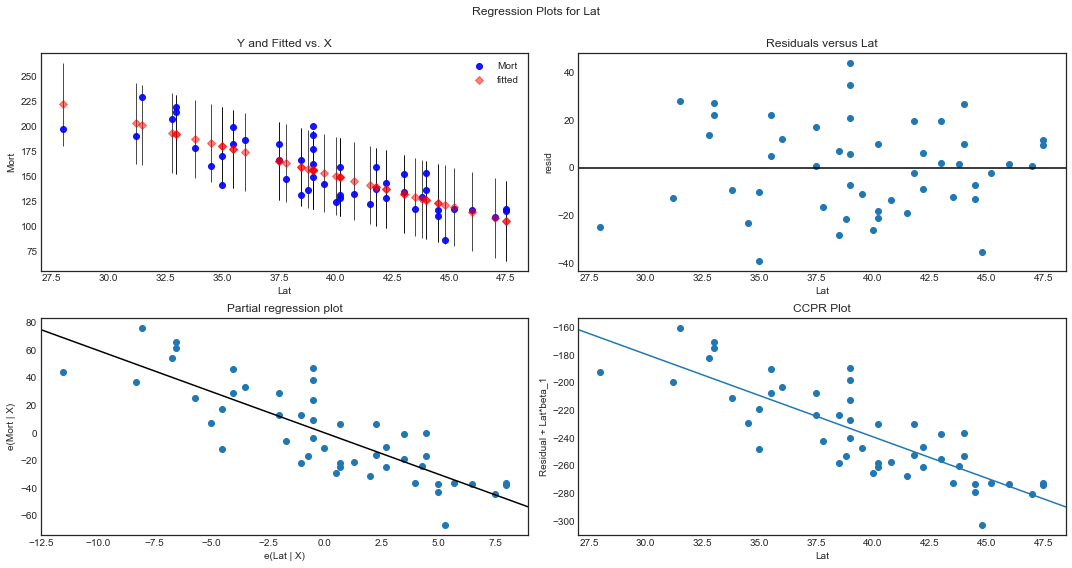

In [12]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(cancer_model, "Lat", fig=fig)

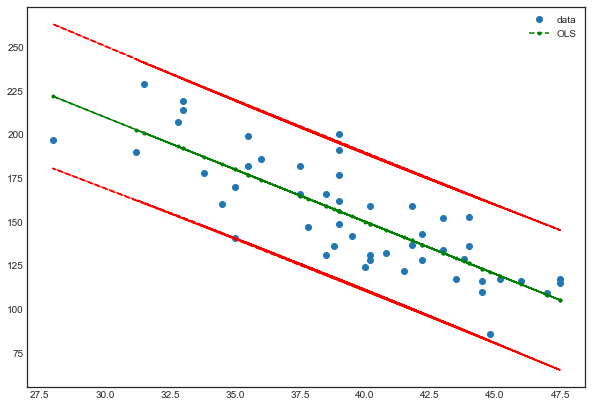

In [13]:
# https://www.learndatasci.com/tutorials/predicting-housing-prices-linear-regression-using-python-pandas-statsmodels/
from statsmodels.sandbox.regression.predstd import wls_prediction_std

# predictor variable (x) and dependent variable (y)
x = cancer[['Lat']]
y = cancer[['Mort']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(cancer_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, cancer_model.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

## Hypothesis Test and Confidence Internval 

Null hypothesis H0 : Î²1 = some number Î² _(in other words, we  can test whether or not the population slope takes on any value)_

Alternative hypothesis HA : Î²1 â‰  some number Î²

By default, the thest conducts the hypothesis test with null hypothesis, Î²1 is equal to 0, and alternative hypothesis, Î²1 is not equal to 0.

Then we calculate the value of the test statistic using the t-distribution:

$$t^*=\frac{b_1-\beta}{\left(\frac{\sqrt{MSE}}{\sqrt{\sum(x_i-\bar{x})^2}} \right)}=\frac{b_1-\beta}{se(b_1)}$$

we use the resulting test statistic to calculate the `P-value`. As always, the P-value is the answer to the question __"how likely is it that weâ€™d get a test statistic t* as extreme as we did if the null hypothesis were true?"__



#### Confidence internval

$$b_1 \pm t_{(\alpha/2, n-2)}\times \left( \frac{\sqrt{MSE}}{\sqrt{\sum(x_i-\bar{x})^2}} \right)$$

The results of the __confidence internval__ gives us:
1. a range of values that is likely to contain the true unknown value Î²1
2. allows us to answer the question: _"is the predictor x linearly related to the response y?"_

If the confidence internval for Î²1 contains 0, then we __conclude that there is no evidence of a linear relationship between the predictor x and the response y in the population__

On the other hand, if the confidence internval for Î²1 does not contain 0, then we __conclude that there is evidence of a linear relationship between the predictor x and the response y in the population__


In [14]:
print(cancer_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Mort   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     99.80
Date:                Tue, 29 Jan 2019   Prob (F-statistic):           3.31e-13
Time:                        11:22:40   Log-Likelihood:                -213.08
No. Observations:                  49   AIC:                             430.2
Df Residuals:                      47   BIC:                             433.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    389.1894     23.812     16.344      0.0

### Drawing Conclusions
After we calculated the hypothesis test and the confidence interval for the slope Î²1, we can see on the line pertaining to the `latitude` preidctor a summary of statistics including:
- `coef` = -5.9776
- `std err` = 0.598 _(standard effeor of the coefficient)_
- `t statistic` = -9.99 _(output from deviding coef by the estimated standard error; assuming that the slope is 0)_

##### Interpreting Hypothesis Test and  P-value
Because the P-value is so small (less than 0.001), we can __reject the null hypothesis and conclude that Î²1 does not equal 0__. There is sufficient evidence, at the Î± = 0.05 level, to conclude that __the slope is not 0, that is, there is a linear relationship in the population between skin cancer mortality and latitude.__

##### Interpreting the Confidence interaval
We can be 95% confident that the population slope is between -7.2 and -4.8. That is, we can be 95% confident that for every additional one-degree increase in latitude, the mean skin cancer mortality rate decreases between 4.8 and 7.2 deaths per 10 million people

### Running a prediction
we can just run the `summary_frame()` [function](https://github.com/statsmodels/statsmodels/issues/987#issuecomment-133575422) and the `get_prediction()` [function](http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLSResults.get_prediction.html) to get the confidenc interval and the prediction interval.

In [15]:
#Statsmodel - prediction for new observation

cancer_model.get_prediction(pd.DataFrame({'Lat':[0]})).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,389.189351,23.812316,341.285151,437.093551,327.760047,450.618655


## ANOVA (F-Test)

There is an alternative method for ansering this question, in which we can use the ANOVA F-test. 


In [16]:
#create fitted model
cancer_model = smf.ols(formula='Mort ~ Lat', data = cancer).fit()

anova_ = sm.stats.anova_lm(cancer_model, typ=2)
print(anova_)

                sum_sq    df          F        PR(>F)
Lat       36464.200203   1.0  99.796827  3.309456e-13
Residual  17173.065103  47.0        NaN           NaN


##### INterpretation of ANOVA
There is a column labeled F, which contains the F-test statistic, and there is a column labeled P, which contains the P-value associated with the F-test. Notice that the P-value, 0.000, appears to be the same as the P-value, 0.000, for the t-test for the slope. The F-test similarly tells us that there is enough statistical evidence to conclude that there is a linear relationship between skin cancer mortality and latitude.

---
## Height and GPA
![](https://i.paigeeworld.com/user-media/1499472000000/58cd7acda34a80c40e7789b9_596149072f427ac80ea6c5ed_320.jpg)

__Research question to investigate:__ __"Is there a (linear) relationship between height and grade point average?"__

In [17]:
hg = pd.read_table("./data/height_gpa.txt")
hg.head()

,height,gpa
0,66.0,2.90
1,57.0,3.16
2,64.5,3.62
3,62.0,2.00
4,69.5,3.45


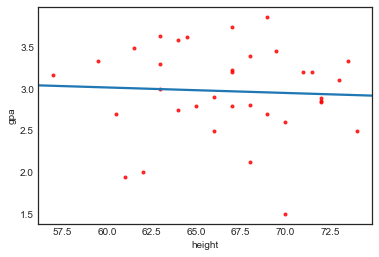

In [18]:

# Scatter plot of expense vs income with least swares regression line added

sns.regplot(hg.height, hg.gpa, order = 1,
           ci =None, scatter_kws={'color':'r', 's':9})

We can see from the fitted line above that there it appears as if there is __almost no relationship whatsoever__. The estimated slope is almost 0.


#### Linear Modelling
we can answer the research question using the P-value of the t-test for:
- testing the null hypothesis H0: Î²1 = 0 
- against the alternative hypothesis HA: Î²1 â‰  0. 

In [19]:
# Ordinary Least Squares (ols) 

#create fitted model
lm = smf.ols(formula='gpa ~ height', data = hg).fit()

print(lm.params,'\n')

# summary of the regression coefficents
print(lm.summary())

Intercept    3.410214
height      -0.006563
dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                    gpa   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.027
Method:                 Least Squares   F-statistic:                   0.09381
Date:                Tue, 29 Jan 2019   Prob (F-statistic):              0.761
Time:                        11:22:40   Log-Likelihood:                -27.216
No. Observations:                  35   AIC:                             58.43
Df Residuals:                      33   BIC:                             61.54
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

#### Interpretation
We can see from the output above that the p-value for the t-test statistic for `height` is 0.761. __There is not enough statistical evidence to conclude that the slope is not 0. We conclude tat there is no linear relationship between height and grade point average.__

In [20]:
# ANOVA
anova_results = sm.stats.anova_lm(lm)
print(anova_results)

            df    sum_sq   mean_sq         F    PR(>F)
height     1.0  0.027590  0.027590  0.093809  0.761314
Residual  33.0  9.705507  0.294106       NaN       NaN


#### Interpretation of ANOVA
the P-value associated with the analysis of variance `F-test, 0.761`, appears to be the same as the P-value, 0.761, for the t-test for the slope. __The F-test similarly tells us that there is insufficient statistical evidence to conclude that there is a linear relationship between height and grade point average.__

---
# Lesson 2: SLR Model Evaluation


## Leadded Gasoline
>Is there a positive relationship between sales of leaded gasoline and lead burden in the bodies of newborn infants? 

https://newonlinecourses.science.psu.edu/stat501/node/262/

In [21]:
lead = pd.read_csv("./data/leadcord.csv")
lead.head()

,Month,Year,Sold,Cord
0,3,1980,141,6.4
1,4,1980,166,6.1
2,5,1980,161,5.7
3,6,1980,170,6.9
4,7,1980,148,7.0


__create fitted model and print the standard regression output__

In [22]:
#create fitted model
lead_model = smf.ols(formula='Cord ~ Sold', data = lead).fit()
print(lead_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Cord   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     9.952
Date:                Tue, 29 Jan 2019   Prob (F-statistic):            0.00830
Time:                        11:22:41   Log-Likelihood:                -12.007
No. Observations:                  14   AIC:                             28.01
Df Residuals:                      12   BIC:                             29.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1082      0.609      6.748      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))


#### Interpretation of OLS regression output
From the output above we can tell that the `p-value` for testing `H0 : Î²1 = 0` against the alternative hypothesis HA : Î²1 â‰  0 is 0.008. __Therefore, since the test statistic is positive__, the P-value for testing H0 : Î²1 = 0 against the alternative hypothesis HA : Î²1 > 0 is 0.008 Ã· 2 = 0.004. The P-value is less than 0.05. __There is sufficient statistical evidence, at the 0.05 level, to conclude that Î²1 > 0.__

In [23]:
print("t-multiplier: ", stats.t.ppf(0.975,12))

t-multiplier:  2.1788128296634177


#### Confidence interval Interpretation
Furthermore, since the 95% t-multiplier is `t(1-.95/2,14-2)`= 2.1788,  a 95% confidence interval for Î²1 is:
0.014885 Â± 2.1788(0.004719) or (0.0046, 0.0252).

The researchers can be 95% confident that the mean lead concentrations in umbilical-cord blood of Massachusetts babies increases between 0.0046 and 0.0252 Âµl/dl for every one-metric ton increase in monthly gasoline lead sales in Massachusetts. It is up to the researchers to debate whether or not this is a meaningful increase.

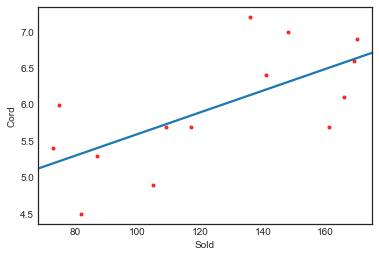

In [24]:
# Scatter plot of expense vs income with least swares regression line added

sns.regplot(x = lead.Sold, y = lead.Cord, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

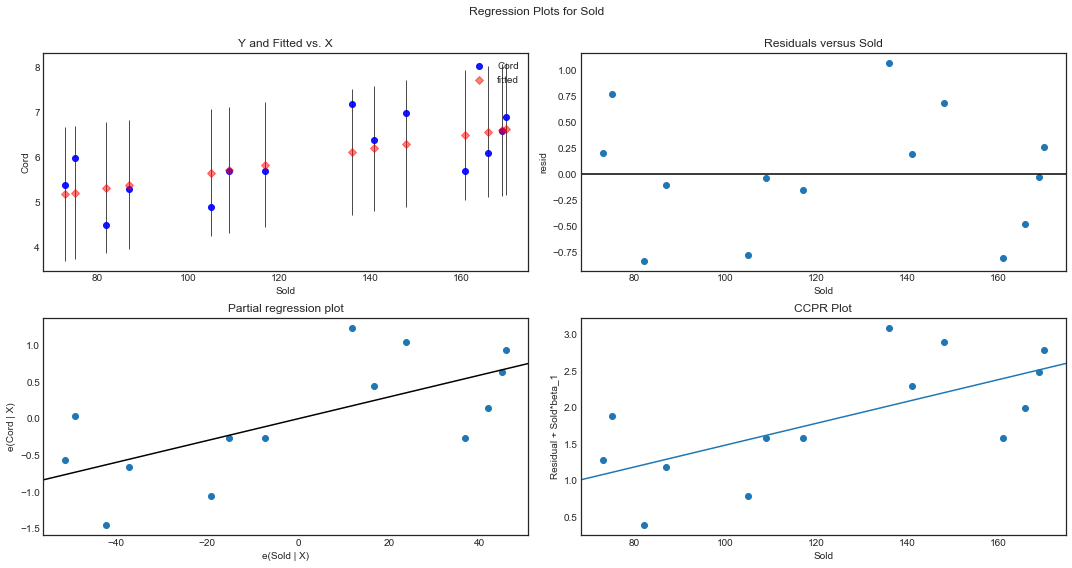

In [25]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(lead_model, "Sold", fig=fig)

#### Interpretation
To answer the question for the relationship between Cord and lead sold, we can see tes, there is a positive relationship from the plots above and from `r-squared` = 0.453.

In [26]:
t_star = stats.t.ppf([0.975], df = df_)

NameError: name 'df_' is not defined

## Height of white spruce trees
In forestry, the diameter of a tree at breast height (which is fairly easy to measure) is used to predict the height of a tree

In [ ]:
trees = pd.read_table("./data/trees.txt", delim_whitespace=True)
trees.head()

> Is there sufficient evidence to conclude that there is a linear association between breast height diameter and tree height? Justify your response by looking at the fitted line plot and by conducting the analysis of variance F-test. In conducting the F-test, specify the null and alternative hypotheses, the significance level you used, and your final conclusion.

__Create regression plot with the trees regression__

In [ ]:
sns.regplot(x = trees.diam, y = trees.ht, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

We can see that the there a strong cluster of observations and the linear line well fits the data. From the initial indicaiton from viewing the plot we can see that there is a positive (high-medium in strength) relationship

### Hypothesis Test
- H0 : Î²1 = 0
- HA : Î²1 â‰  0

In [ ]:
#create fitted model
tree_model = smf.ols(formula='ht ~ diam', data = trees).fit()
print(tree_model.summary())

From the regression output above, we can see from the `diam` `p-value` is <0.000, __therefore with a significance level of 0.05, there is strong evidence there is linear relationship between height and diam.__

In [ ]:
anova_results = sm.stats.anova_lm(tree_model, typ=1)
print(anova_results)

From the ANOVA output above we can conclude at an alpha level of <0.000 that there is strong evidence there is linear relationship between height nad diam

>Which value in the ANOVA table quantifies how far the estimated regression line is from the "no trend" line? That is, what is the particular value for this data set?

`diam` `sum_sq` __SSR__ 183

In [ ]:
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(tree_model, "diam", fig=fig)

-----
# New Checking Accounts

![](https://d2e70e9yced57e.cloudfront.net/wallethub/images/posts/12719/types-of-checking-accounts.jpg)

>describe the relationship between the size of the minimum deposit required when opening a new checking account at a bank (x) and the number of new accounts at the bank (y)

In [ ]:
bank = pd.read_table("./data/checking.txt")
bank.head()

__create regression plot__

In [ ]:
sns.regplot(x = bank.Size, y = bank.New, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

In [ ]:
#create fitted model
bank_model = smf.ols(formula='New ~ Size', data = bank).fit()
bank_anova = sm.stats.anova_lm(bank_model, typ=3)
print(bank_anova)

In [ ]:
print(bank_model.summary())

----
# Highway Sign
__Reading Dtance and Driver Age__

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQoKEnTP0bxBM845D-TlH4HT-2FwwvmMiJ9vREqwf8-XT0wp4If)

>The data are n = 30 observations on driver age and the maximum distance (feet) at which individuals can read a highway sign

In [ ]:
drive = pd.read_table("./data/driver_age_sign.txt")
drive.head()


__The plot below gives a scatterplot of the highway sign data along with the least squares regression line.__

In [ ]:
sns.regplot(x = drive.Age, y = drive.Distance, order = 1,
           ci = None, scatter_kws={'color':'r', 's':9})

### Hypothesis Test for Slope (Linearity?)

This test can be used to test whether or not x and y are linearly related. The slope directly tells us about the link between the mean y and x. When the true population slope does not equal 0, the variables y and x are linearly related. When the slope is 0, there is not a linear relationship because the mean y does not change when the value of x is  changed. 

* H0 : Î²1 = 0
* HA : Î²1 â‰  0

__Here is the accompanying Regression Output__

In [ ]:
#create fitted model
drive_model = smf.ols(formula='Distance ~ Age', data = drive).fit()
print(drive_model.summary())

#### Interpretation of HT for the Slope
In other words, the null hypothesis is testing if the population slope is equal to 0 versus the alternative hypothesis that the population slope is not equal to 0. To test whether the population slope is 0, the information from the Minitab output is used as follows:
1. The sample slope is b1 = âˆ’3.0068, the value under Coef in the Age row of the output.
2. The SE of the sample slope, written as se(b1), is se(b1) = 0.4243, the value under SE Coef. Again, the SE of any statistic is a measure of its accuracy. In this case, the SE of b1 gives, very roughly, the average difference between the sample b1 and the true population slope Î²1, for random samples of this size (and with these x-values).
3. The test statistic is t = b1/se(b1) = âˆ’3.0068/0.4243 = âˆ’7.09, the value under T.
4. The p-value for the test is p = 0.000 and is given under P.
5. The decision rule at the 0.05 significance level is to reject the null hypothesis since our p < 0.05. Thus, we conclude that there is statistically significant evidence that the variables of Distance and Age are linearly related.


----
# Lesson 4: SLR Model Assumptions

# Alcohol and Muscel Strength


![](http://indybeers.com/wp-content/uploads/2012/09/Homer-Simpson-Beer-Muscle.jpg)

>  Some researchers (Urbano-Marquez, et al., 1989) were interested in determining whether or not alcohol consumption was linearly related to muscle strength. The researchers measured the total lifetime consumption of alcohol (x) on a random sample of n = 50 alcoholic men. They also measured the strength (y) of the deltoid muscle in each person's nondominant arm.


In [27]:
drinks = pd.read_table("./data/alcoholarm.txt")
drinks.head()

,alcohol,strength
0,36.2,10.0
1,39.7,10.0
2,39.5,10.8
3,18.2,12.2
4,29.2,13.1


__Below is a fitted line plot of the resulting data:__

The `graphics.plot_regress_exog` plots four graphs in a 2 by 2 figure: 
- â€˜endog versus exogâ€™, 
- â€˜residuals versus exogâ€™, 
- â€˜fitted versus exogâ€™ and 
- â€˜fitted plus residual versus exogâ€™

https://www.statsmodels.org/dev/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html

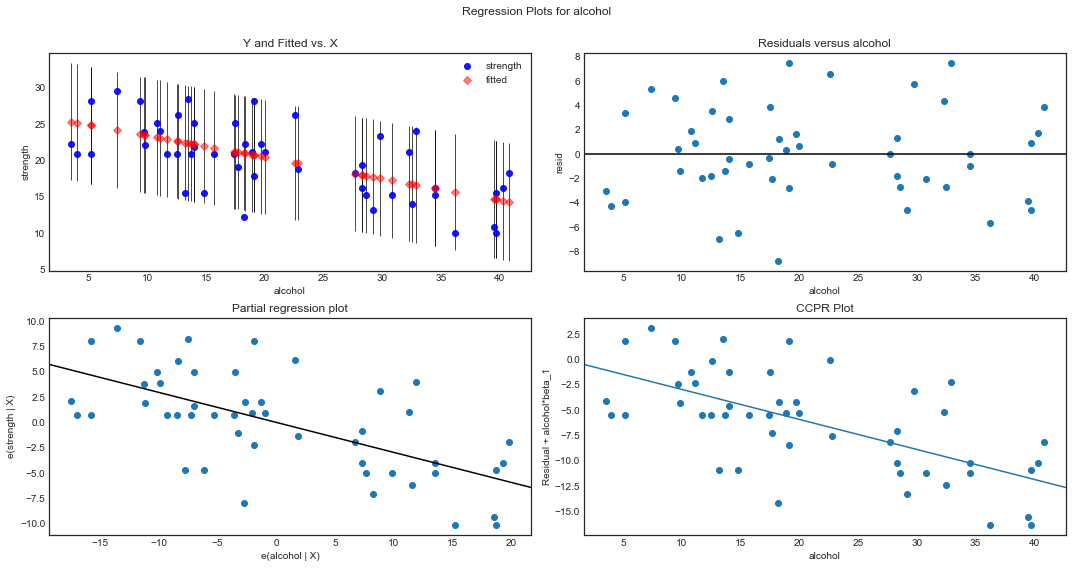

In [33]:
# create a reression model
drinks_model = smf.ols(formula='strength ~ alcohol', data = drinks).fit()

# plot regression results
fig = plt.figure(figsize = (15,8))
fig = sm.graphics.plot_regress_exog(drinks_model, "alcohol", fig=fig)

### Interpretation of the `CCPR Plot` REGRESSION PLOT
- __Linearity__ the `CCPR Plot` suggest that __there is decreasing linear relationship between alcohol and arm strength.__ 
- __Outliers__ It also suggest that there are __no unusual data points in the data set.__ 
 __Equal Variance__ And, it illustrates that the variation around the stimated regression line is constant suggesting that the assumpition of equal error variation is reasonable. 


### `Residuals vs Fits Plot`
The `residual vs fits plot` for the simple linear regression model with arm strength as the response and and level of alcohol consumption as the predicttor. 

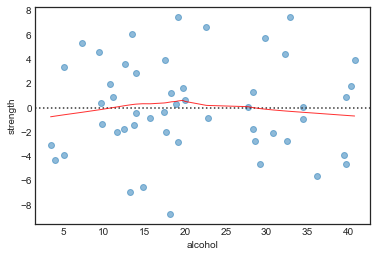

In [35]:
sns.residplot('alcohol', 'strength', data=drinks, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

### Interpretation of the `Residuals vs Fits Plot`
- the residuals appear on the y axis and the fitted values appear on the x axis.


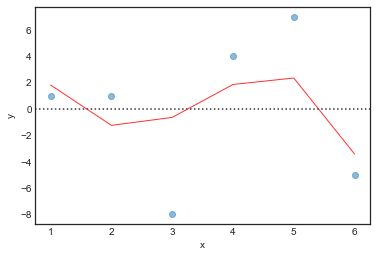

In [41]:
sns.residplot('x', 'y', data=index_, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

In [42]:
index_ = pd.read_table("./data/treadmill.txt")
index_.head()

,dur,vo2,heart,age,height,weight
0,706,41.5,192,46,165,57
1,732,45.9,190,25,193,95
2,930,54.5,190,25,187,82
3,900,60.3,174,31,191,84
4,903,60.5,194,30,171,67


__Below is the regression plot__

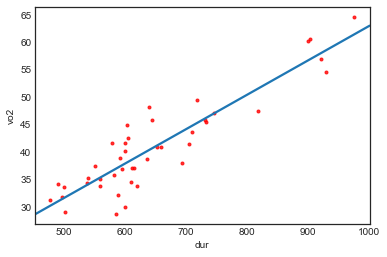

In [44]:
sns.regplot('dur', 'vo2', data=index_, order = 1, ci =None, scatter_kws={'color':'r', 's':9})

There is a clear appearance of linearioty between the two variablems. 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


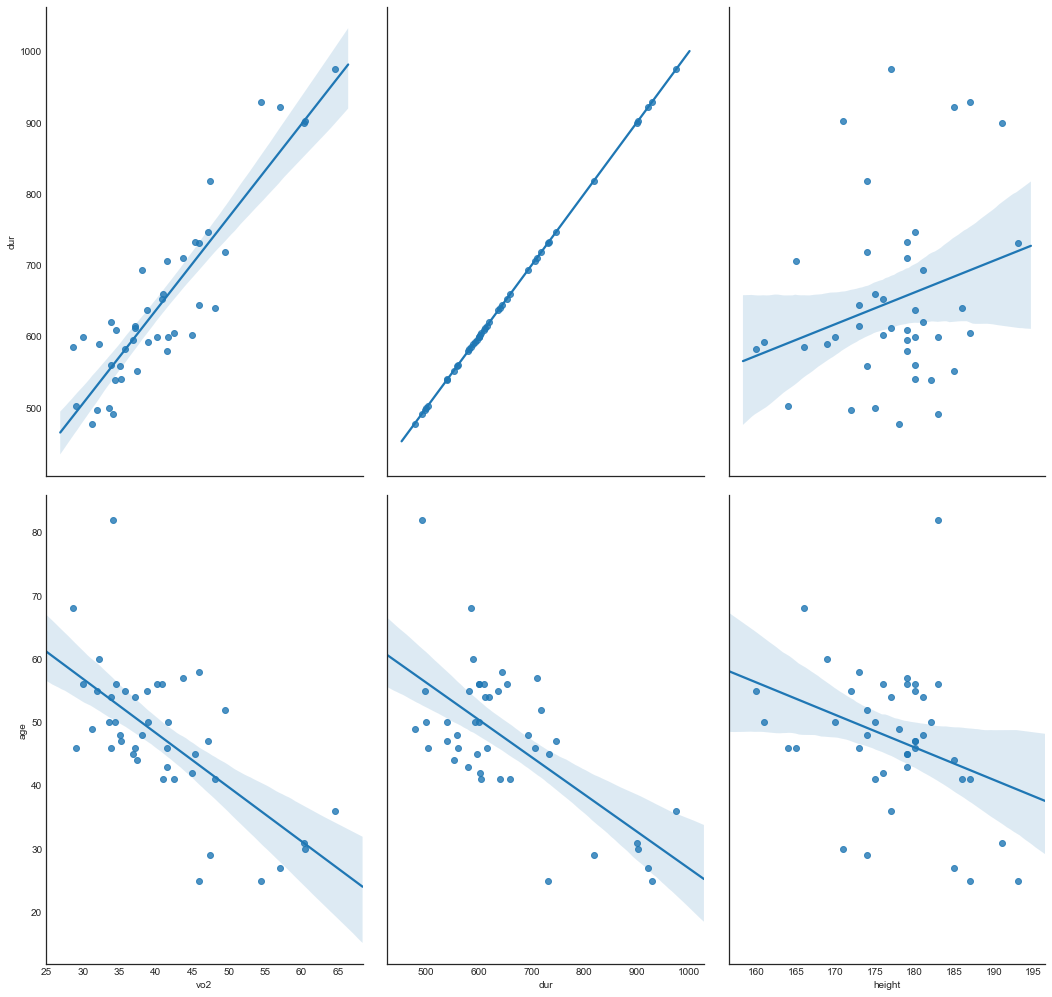

In [47]:
sns.pairplot(index_,
            x_vars = ['vo2', 'dur', 'height'],
            y_vars = ['dur','age'],
            kind = 'reg', size = 7, aspect=0.7)

__Fit a simple linear regression model using Minitab's fitted line plot treating vo2 as the response y and age as the predictor x. Does there appear to be a linear relationship between vo2 and age?__

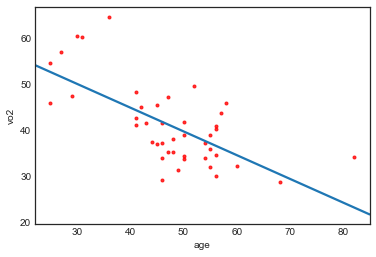

In [48]:
sns.regplot('age', 'vo2', data=index_, order = 1, ci =None, scatter_kws={'color':'r', 's':9})

Yes a linear relationship exist between the two variables.,

__Fit a simple linear regression model using Minitab's fitted line plot treating dur as the response y and age as the predictor x. Does there appear to be a linear relationship between age and dur?__

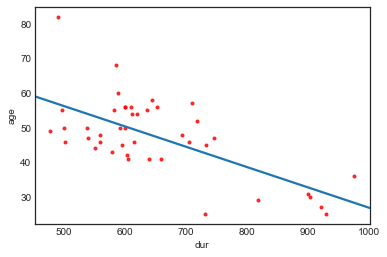

In [50]:
sns.regplot('dur', 'age', data=index_, order = 1, ci =None, scatter_kws={'color':'r', 's':9})

Yes a linear relationship exist between the two variables.,

Now, fit a simple linear regression model using Minitab's regression command treating vo2 as the response y and dur as the predictor x. In doing so, request a residuals vs. age plot. (See Minitab Help Section - Creating residual plots). Does the residuals vs. age plot suggest that age would be an additional good predictor to add to the model to help explain some of the variation in vo2?

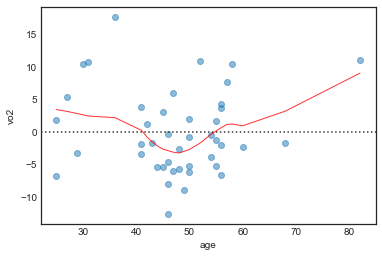

In [52]:
sns.residplot('age', 'vo2', data=index_, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

residual vs age plot does not suggest that `age` would be an additional good predictor to add to the model to hepl explain some of the variation in `vo2` since there does not appear to be a strong linear trend in this plot